<a href="https://colab.research.google.com/github/dp1500/2byteCode-Business-Analysis/blob/main/2ByteCodeAnalysis_User_Engagement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# df = pd.read_csv("/content/2bytecode.csv")

In [ ]:
import pandas as pd
import json

# Load the JSON data from a file (replace 'input.json' with your file path)
with open('data.json', 'r') as json_file:
    data = json.load(json_file)

# Extract the list of user objects from the "Users" object
user_list = data['Users']['Users']

# Convert the list of user objects to a Pandas DataFrame
df = pd.DataFrame(user_list)

# Save the DataFrame to a CSV file (replace 'output.csv' with your desired file path)
df.to_csv('2ByteCodeData.csv', index=False)

print(f"JSON data converted to CSV and saved as 'output.csv'.")


JSON data converted to CSV and saved as 'output.csv'.


In [ ]:
# Read the CSV file (replace 'output.csv' with your file name)
df = pd.read_csv('2ByteCodeData.csv')

# Display the first few rows of the DataFrame
df.head()

In [ ]:
# Download the CSV file
from google.colab import files
files.download('2ByteCodeData.csv')

FileNotFoundError: ignored

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/2ByteCodeData.csv', skiprows=range(1, 37))

In [ ]:
df.head()

,uid,current_scrn,time_spent,next_scrn,time,extra
0,akramzeeshan837@gmail.com,HOME,12.0,FLUTTER_DOCUMENT,1.693108e+12,NaN
1,akramzeeshan837@gmail.com,FLUTTER_DOCUMENT,1.0,FLUTTER_WIDGET,1.693108e+12,animation
2,akramzeeshan837@gmail.com,FLUTTER_WIDGET,2.0,NaN,1.693108e+12,NaN
3,akramzeeshan837@gmail.com,HOME,12.0,ROADMAP,1.693108e+12,NaN
4,akramzeeshan837@gmail.com,ROADMAP,3.0,NaN,1.693108e+12,NaN


In [ ]:
# Convert time data in place
def milliseconds_to_hhmm(milliseconds):
    if pd.isna(milliseconds):
        return np.nan

    # Convert milliseconds to datetime
    datetime_obj = pd.to_datetime(milliseconds, unit='ms')
    return datetime_obj.strftime('%H:%M')

df['time'] = df['time'].apply(milliseconds_to_hhmm)

In [ ]:
df.head()

,uid,current_scrn,time_spent,next_scrn,time,extra
0,akramzeeshan837@gmail.com,HOME,12.0,FLUTTER_DOCUMENT,03:39,NaN
1,akramzeeshan837@gmail.com,FLUTTER_DOCUMENT,1.0,FLUTTER_WIDGET,03:39,animation
2,akramzeeshan837@gmail.com,FLUTTER_WIDGET,2.0,NaN,03:39,NaN
3,akramzeeshan837@gmail.com,HOME,12.0,ROADMAP,03:40,NaN
4,akramzeeshan837@gmail.com,ROADMAP,3.0,NaN,03:40,NaN


# Analysis begining

## User Engagement Analysis:

### Average Time Spent:

current_scrn
QUIZ_QUES_SCR       83.844262
COURSES             55.086207
DOCS_READING        40.648894
FWC                 31.431953
ROADMAP             28.847162
QUIZ_ANSWER_SCR     21.255319
STATISTICS_SCR      15.157407
HOME                 9.062618
DART_DOCUMENT        8.050776
INSTRUCTION_SCR      4.504425
QUIZ                 4.280645
FLUTTER_WIDGET       4.024335
QUIZ_RESULT          3.587302
FLUTTER_DOCUMENT     3.456393
Name: time_spent, dtype: float64


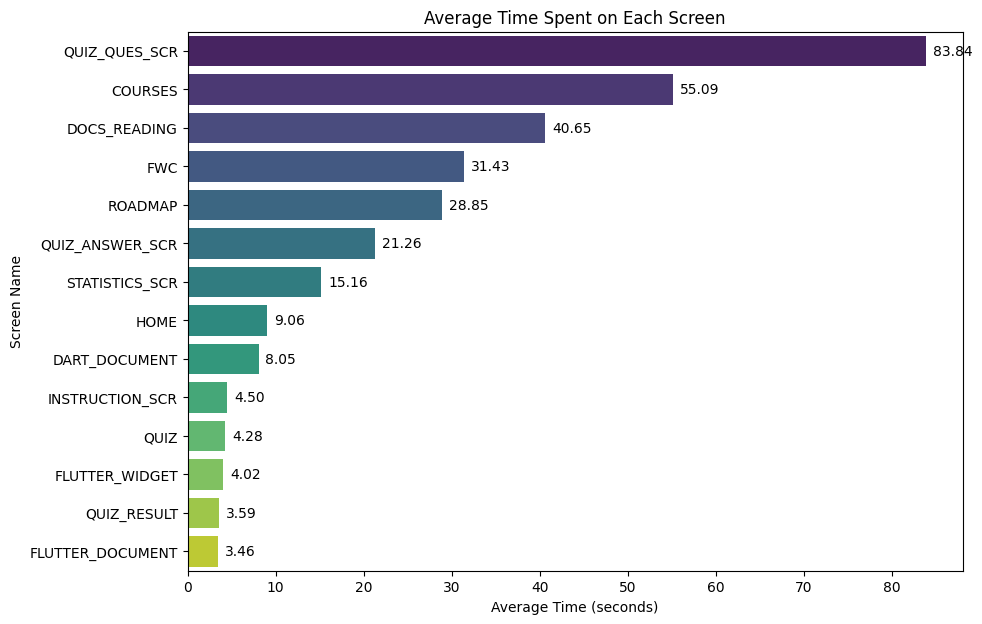

In [ ]:
# Calculate the average time spent on each screen
average_time = df.groupby('current_scrn')['time_spent'].mean()
average_time_sorted = average_time.sort_values(ascending=False)
print(average_time_sorted)

#plotting chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
ax = sns.barplot(y=average_time_sorted.index, x=average_time_sorted.values, palette="viridis")
plt.title('Average Time Spent on Each Screen')
plt.xlabel('Average Time (seconds)')
plt.ylabel('Screen Name')
# plt.show()

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')
# plt.tight_layout()
plt.show()

### Most Visited Screens: Identify which screens are most commonly accessed.

FLUTTER_WIDGET      2219
HOME                2124
DOCS_READING        1763
FLUTTER_DOCUMENT    1525
DART_DOCUMENT        709
FWC                  507
QUIZ                 310
ROADMAP              229
INSTRUCTION_SCR      226
QUIZ_RESULT          126
QUIZ_QUES_SCR        122
COURSES              116
STATISTICS_SCR       108
QUIZ_ANSWER_SCR       94
Name: current_scrn, dtype: int64


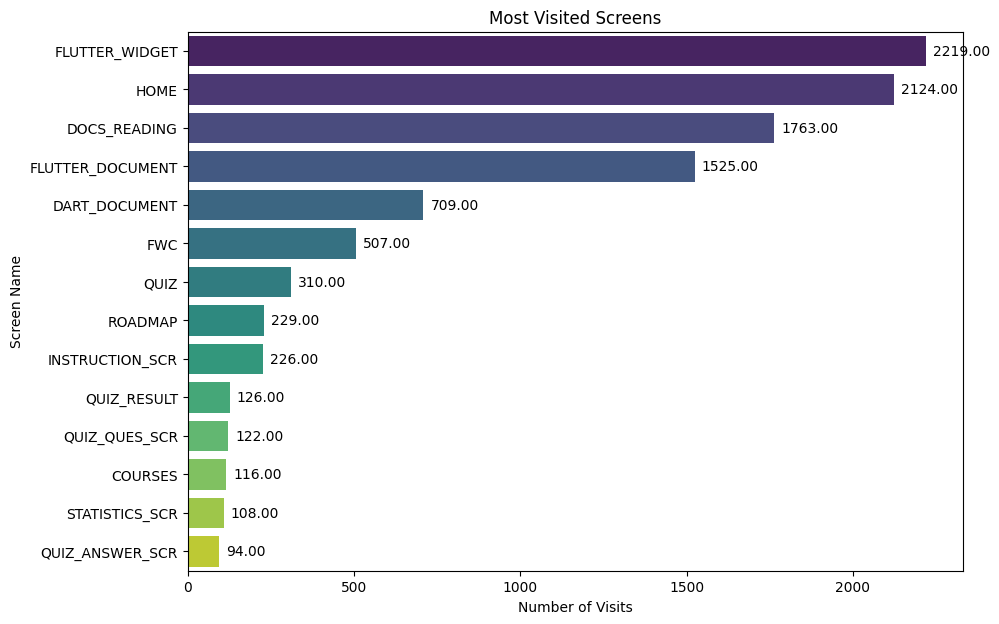

In [ ]:
most_visited = df['current_scrn'].value_counts()
print(most_visited)

screens_visited = df['current_scrn'].value_counts()

plt.figure(figsize=(10, 7))
ax = sns.barplot(y=screens_visited.index, x=screens_visited.values, palette="viridis")
plt.title('Most Visited Screens')
plt.xlabel('Number of Visits')
plt.ylabel('Screen Name')
# plt.show()

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')
plt.show()

### User Flow Paths: Track common sequences of screens

FLUTTER_DOCUMENT -> FLUTTER_WIDGET    1399
FLUTTER_WIDGET -> DOCS_READING        1243
DOCS_READING -> FLUTTER_WIDGET         811
FLUTTER_WIDGET -> FLUTTER_DOCUMENT     704
DART_DOCUMENT -> DOCS_READING          519
                                      ... 
HOME -> FLUTTER_WIDGET                   1
DOCS_READING -> DOCS_READING             1
ROADMAP -> DART_DOCUMENT                 1
QUIZ_RESULT -> FWC                       1
QUIZ_RESULT -> FLUTTER_DOCUMENT          1
Name: flow_path, Length: 64, dtype: int64


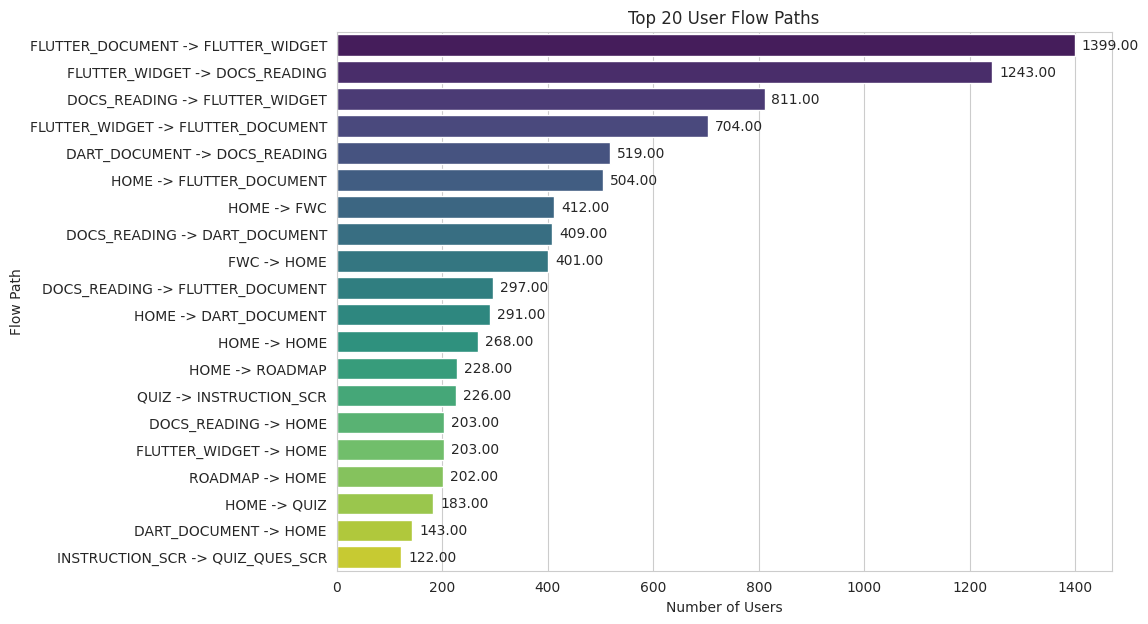

In [ ]:
# Group by user and then create a shifted column for the next screen
df['following_scrn'] = df.groupby('uid')['current_scrn'].shift(-1)

# Create a combined column for the flow path
df['flow_path'] = df['current_scrn'] + ' -> ' + df['following_scrn']

# Get counts of each flow path
flow_counts = df['flow_path'].value_counts()
top_flow_counts = flow_counts.head(20)
print(flow_counts)

# Set a seaborn style
sns.set_style("whitegrid")

# Plotting the data
plt.figure(figsize=(10, 7))
ax = sns.barplot(y=top_flow_counts.index, x=top_flow_counts.values, palette='viridis')
# sx = flow_counts.head(20).plot(kind='barh', color='skyblue')  # Showing top 20 paths for clarity
# plt.gca().invert_yaxis()  # So that the most common path is on top
plt.title('Top 20 User Flow Paths')
plt.xlabel('Number of Users')
plt.ylabel('Flow Path')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.show()



### Drop-off Points: Identify where users typically exit the app.

HOME                68
FLUTTER_WIDGET      49
FWC                 44
DART_DOCUMENT       35
DOCS_READING        31
ROADMAP             17
FLUTTER_DOCUMENT    11
INSTRUCTION_SCR     11
STATISTICS_SCR       7
QUIZ                 5
COURSES              5
QUIZ_RESULT          3
QUIZ_ANSWER_SCR      2
QUIZ_QUES_SCR        1
Name: current_scrn, dtype: int64


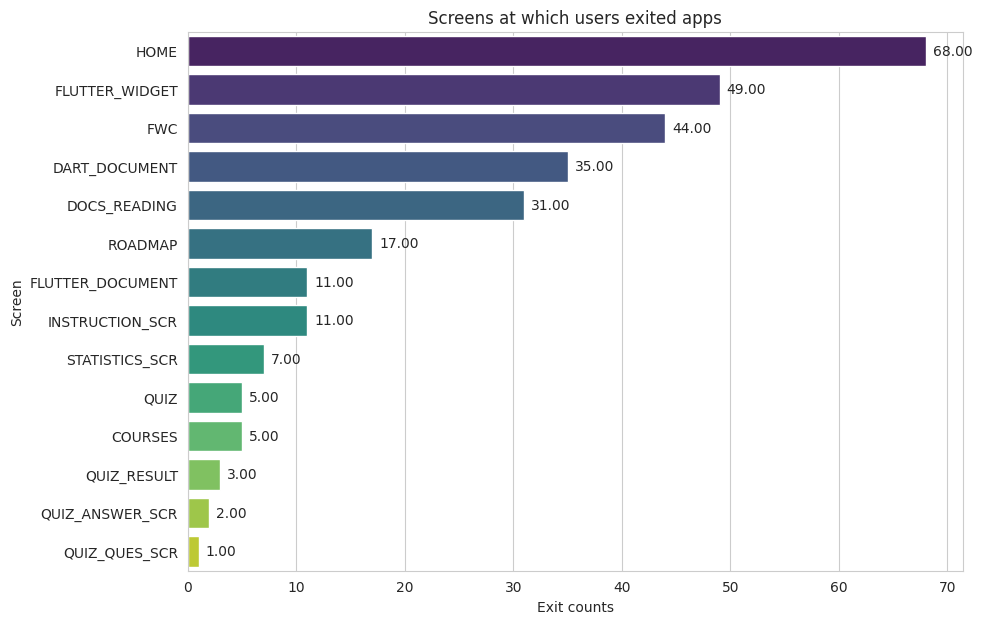

In [ ]:
# Filter the dataframe to get the last action of each user
last_action = df.drop_duplicates(subset='uid', keep='last')

# Count the screens where users typically exit
drop_off_points = last_action['current_scrn'].value_counts()
print(drop_off_points)

plt.figure(figsize=(10,7))

ax = sns.barplot(y=drop_off_points.index, x = drop_off_points.values, palette='viridis')
plt.title('Screens at which users exited apps')
plt.xlabel('Exit counts')
plt.ylabel('Screen')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.show()